In [174]:
#!pip install pyforest

# 1-Import Libraies
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import missingno as msno 

from sklearn.compose import make_column_transformer

#Scaling
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler


#Importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

#Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

#Figure&Display options
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#!pip install termcolor
import colorama
from colorama import Fore, Style  # maakes strings colored
from termcolor import colored

import ipywidgets
from ipywidgets import interact

In [175]:
## Useful Functions

###############################################################################

def missing(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

def missing_values(df):
    return missing(df)[missing(df)['Missing_Number']>0]

###############################################################################

def first_looking(df):
    print(colored("Shape:", attrs=['bold']), df.shape,'\n',
          f"There is ", df.shape[0], " observation and ", df.shape[1], " columns in the dataset.", '\n',
          colored('-'*79, 'red', attrs=['bold']),
          colored("\nInfo:\n", attrs=['bold']), sep='')
    print(df.info(), '\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("Number of Uniques:\n", attrs=['bold']), df.nunique(),'\n',
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("Missing Values:\n", attrs=['bold']), missing_values(df),'\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("All Columns:", attrs=['bold']), list(df.columns),'\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')

    df.columns= df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

    print(colored("Columns after rename:", attrs=['bold']), list(df.columns),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')

def duplicate_values(df):
    duplicate_values = df.duplicated(subset=None, keep='first').sum()
    if duplicate_values > 0:
        df.drop_duplicates(keep='first', inplace=True)
        print(duplicate_values, colored("duplicates were dropped", attrs=['bold']),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
    else:
        print(colored("No duplicates", attrs=['bold']),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
        
def drop_columns(df, drop_columns):
    if drop_columns !=[]:
        df.drop(drop_columns, axis=1, inplace=True)
        print(drop_columns, 'were dropped')
    else:
        print(colored('We will now check the missing values and if necessary drop some columns!!!', attrs=['bold']),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
        
def drop_null(df, limit):
    print('Shape:', df.shape)
    for i in df.isnull().sum().index:
        if (df.isnull().sum()[i]/df.shape[0]*100)>limit:
            print(df.isnull().sum()[i], 'percent of', i ,'null and were dropped')
            df.drop(i, axis=1, inplace=True)
            print('new shape:', df.shape)
        else:
            print(df.isnull().sum()[i], '%, percentage of missing values of', i ,'less than limit', limit, '%, so we will keep it.')
    print('New shape after missing value control:', df.shape)

###############################################################################

    FINAL_CUSTOMER_DATATHON.csv 
                                ['unnamed:_0', 'base_customer_id', 'customer_id', 
                                 'gender', 'gender_id', 'marital_status', 'marital_status_id', 
                                 'birth_date', 'fk_address_communication_city', 'occupation'] 

    FINAL_CUSTOMER_RELATED_TABLE_FOR_DATATHON.csv 
                                ['unnamed:_0', 'base_customer_id', 'vehicle_id', 'start_date',
                                 'end_date', 'fk_relation_status_id', 'fk_relation_status_explanation']
          
    FINAL_SALES_FILE_DATATHON.csv 
                                ['unnamed:_0', 'customer_id', 'salesfile_id', 'sf_create_date', 'status',
                                 'req_brand_code', 'req_topmodel_code']
          
    FINAL_SIFIR_ARAC_ALANLAR_DATATHON.csv 
                                ['unnamed:_0', 'vehicle_id', 'traffic_date', 'brand_code',
                                 'basemodel_code', 'topmodel_code', 'motor_gas_type', 'gear_box_type']
          
    FINAL_VEHICLE_TABLE_DATATHON.csv 
                                ['unnamed:_0', 'vehicle_id', 'customer_id', 'create_date']
    
    MASK_SERVIS_BAKIM_DATATHON_FINAL.csv 
                                ['unnamed:_0', 'create_date', 'is_maintenance', 'vehicle_id',
                                 'total_amount_tl']
          
    sample_submission.csv       ['id', 'expected']

In [176]:
dataset_path1 = "FINAL_CUSTOMER_DATATHON.csv"
df01_ = pd.read_csv(dataset_path1)
df1_ = df01_.copy()

dataset_path2 = "FINAL_CUSTOMER_RELATED_TABLE_FOR_DATATHON.csv"
df02_ = pd.read_csv(dataset_path2)
df2_ = df02_.copy()

dataset_path3 = "FINAL_SALES_FILE_DATATHON.csv"
df03_ = pd.read_csv(dataset_path3)
df3_ = df03_.copy()

dataset_path4 = "FINAL_SIFIR_ARAC_ALANLAR_DATATHON.csv"
df04_ = pd.read_csv(dataset_path4)
df4_ = df04_.copy()

dataset_path5 = "FINAL_VEHICLE_TABLE_DATATHON.csv"
df05_ = pd.read_csv(dataset_path5)
df5_ = df05_.copy()

dataset_path6 = "MASK_SERVIS_BAKIM_DATATHON_FINAL.csv"
df06_ = pd.read_csv(dataset_path6)
df6_ = df06_.copy()

dataset_path7 = "sample_submission.csv"
df07_ = pd.read_csv(dataset_path7)
df7_ = df07_.copy()

In [177]:
# # lets check the Summary Statistics for each of the Crops

# @interact
# def summary(df_list):
#     first_looking(df)
#     duplicate_values(df)
#     drop_columns(df,[])
#     drop_null(df, 90)

In [178]:
# 2-Load|Read Data
dataset_path = "FINAL_CUSTOMER_DATATHON.csv"
df0 = pd.read_csv(dataset_path)
df = df0.copy() 
first_looking(df)
duplicate_values(df)
drop_columns(df,[])
drop_null(df, 90)
# df.head()
# df.tail()
# df.sample(5)
# df.describe().T
# df.describe(include=object).T

Shape:(849919, 10)
There is 849919 observation and 10 columns in the dataset.
-------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 849919 entries, 0 to 849918
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0                     849919 non-null  int64  
 1   BASE_CUSTOMER_ID               849919 non-null  int64  
 2   CUSTOMER_ID                    849919 non-null  int64  
 3   GENDER                         849916 non-null  object 
 4   GENDER_ID                      849919 non-null  int64  
 5   MARITAL_STATUS                 620802 non-null  object 
 6   MARITAL_STATUS_ID              849919 non-null  int64  
 7   BIRTH_DATE                     645447 non-null  float64
 8   FK_ADDRESS_COMMUNICATION_CITY  730341 non-null  object 
 9   OCCUPATION                     381052 non-null  

In [179]:
# 2-Load|Read Data
dataset_path = "FINAL_CUSTOMER_RELATED_TABLE_FOR_DATATHON.csv"
df0 = pd.read_csv(dataset_path)
df = df0.copy() 
first_looking(df)
duplicate_values(df)
drop_columns(df,[])
drop_null(df, 90)
# df.head()
# df.tail()
# df.sample(5)
# df.describe().T
# df.describe(include=object).T

Shape:(374879, 7)
There is 374879 observation and 7 columns in the dataset.
-------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374879 entries, 0 to 374878
Data columns (total 7 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   Unnamed: 0                      374879 non-null  int64 
 1   BASE_CUSTOMER_ID                374879 non-null  int64 
 2   VEHICLE_ID                      374879 non-null  int64 
 3   START_DATE                      374879 non-null  object
 4   END_DATE                        159757 non-null  object
 5   FK_RELATION_STATUS_ID           374879 non-null  int64 
 6   FK_RELATION_STATUS_EXPLANATION  374879 non-null  object
dtypes: int64(4), object(3)
memory usage: 20.0+ MB
None
-------------------------------------------------------------------------------
Number of Uniques:
Unnamed: 0             

In [180]:
# 2-Load|Read Data
dataset_path = "FINAL_SALES_FILE_DATATHON.csv"
df0 = pd.read_csv(dataset_path)
df = df0.copy() 
first_looking(df)
duplicate_values(df)
drop_columns(df,[])
drop_null(df, 90)
# df.head()
# df.tail()
# df.sample(5)
# df.describe().T
# df.describe(include=object).T

Shape:(397526, 7)
There is 397526 observation and 7 columns in the dataset.
-------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397526 entries, 0 to 397525
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         397526 non-null  int64  
 1   CUSTOMER_ID        397526 non-null  int64  
 2   SALESFILE_ID       397526 non-null  float64
 3   SF_CREATE_DATE     397526 non-null  object 
 4   STATUS             397526 non-null  int64  
 5   REQ_BRAND_CODE     397526 non-null  object 
 6   REQ_TOPMODEL_CODE  397237 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 21.2+ MB
None
-------------------------------------------------------------------------------
Number of Uniques:
Unnamed: 0           397526
CUSTOMER_ID          183523
SALESFILE_ID         396278
SF_CREATE_DATE       395534
STATUS 

In [181]:
# 2-Load|Read Data
dataset_path = "FINAL_SIFIR_ARAC_ALANLAR_DATATHON.csv"
df0 = pd.read_csv(dataset_path)
df = df0.copy() 
first_looking(df)
duplicate_values(df)
drop_columns(df,[])
drop_null(df, 90)
# df.head()
# df.tail()
# df.sample(5)
# df.describe().T
# df.describe(include=object).T

Shape:(169525, 4)
There is 169525 observation and 4 columns in the dataset.
-------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169525 entries, 0 to 169524
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Unnamed: 0   169525 non-null  int64 
 1   VEHICLE_ID   169525 non-null  int64 
 2   CUSTOMER_ID  169525 non-null  int64 
 3   CREATE_DATE  169525 non-null  object
dtypes: int64(3), object(1)
memory usage: 5.2+ MB
None
-------------------------------------------------------------------------------
Number of Uniques:
Unnamed: 0     169525
VEHICLE_ID     169521
CUSTOMER_ID    138432
CREATE_DATE    151242
dtype: int64
-------------------------------------------------------------------------------
Missing Values:
Empty DataFrame
Columns: [Missing_Number, Missing_Percent]
Index: []
-------------------------------------------------------

In [182]:
# 2-Load|Read Data
dataset_path = "FINAL_VEHICLE_TABLE_DATATHON.csv"
df0 = pd.read_csv(dataset_path)
df = df0.copy() 
first_looking(df)
duplicate_values(df)
drop_columns(df,[])
drop_null(df, 90)
# df.head()
# df.tail()
# df.sample(5)
# df.describe().T
# df.describe(include=object).T

Shape:(345092, 8)
There is 345092 observation and 8 columns in the dataset.
-------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345092 entries, 0 to 345091
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      345092 non-null  int64 
 1   VEHICLE_ID      345092 non-null  int64 
 2   TRAFFIC_DATE    344226 non-null  object
 3   BRAND_CODE      345092 non-null  object
 4   BASEMODEL_CODE  345092 non-null  int64 
 5   TOPMODEL_CODE   345092 non-null  int64 
 6   MOTOR_GAS_TYPE  272646 non-null  object
 7   GEAR_BOX_TYPE   261077 non-null  object
dtypes: int64(4), object(4)
memory usage: 21.1+ MB
None
-------------------------------------------------------------------------------
Number of Uniques:
Unnamed: 0        345092
VEHICLE_ID        345092
TRAFFIC_DATE        7428
BRAND_CODE             5
BASEMODEL_CODE      24

In [183]:
# 2-Load|Read Data
dataset_path = "MASK_SERVIS_BAKIM_DATATHON_FINAL.csv"
df0 = pd.read_csv(dataset_path)
df = df0.copy() 
first_looking(df)
duplicate_values(df)
drop_columns(df,[])
drop_null(df, 90)
# df.head()
# df.tail()
# df.sample(5)
# df.describe().T
# df.describe(include=object).T

Shape:(1041000, 5)
There is 1041000 observation and 5 columns in the dataset.
-------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041000 entries, 0 to 1040999
Data columns (total 5 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1041000 non-null  int64  
 1   CREATE_DATE      1041000 non-null  object 
 2   IS_MAINTENANCE   1041000 non-null  int64  
 3   VEHICLE_ID       1041000 non-null  int64  
 4   TOTAL_AMOUNT_TL  965596 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 39.7+ MB
None
-------------------------------------------------------------------------------
Number of Uniques:
Unnamed: 0         1041000
CREATE_DATE        1033883
IS_MAINTENANCE           2
VEHICLE_ID          225447
TOTAL_AMOUNT_TL      16006
dtype: int64
------------------------------------------------------------------------

In [184]:
# 2-Load|Read Data
dataset_path = "sample_submission.csv"
df0 = pd.read_csv(dataset_path)
df = df0.copy() 
first_looking(df)
duplicate_values(df)
drop_columns(df,[])
drop_null(df, 90)
# df.head()
# df.tail()
# df.sample(5)
# df.describe().T
# df.describe(include=object).T

Shape:(166943, 2)
There is 166943 observation and 2 columns in the dataset.
-------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166943 entries, 0 to 166942
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Id        166943 non-null  int64  
 1   Expected  0 non-null       float64
dtypes: float64(1), int64(1)
memory usage: 2.5 MB
None
-------------------------------------------------------------------------------
Number of Uniques:
Id          166943
Expected         0
dtype: int64
-------------------------------------------------------------------------------
Missing Values:
          Missing_Number  Missing_Percent
Expected          166943            1.000
-------------------------------------------------------------------------------
All Columns:['Id', 'Expected']
-----------------------------------------------------------------------

In [185]:
print(df1_.columns)
print(df2_.columns)
print(df3_.columns)
print(df4_.columns)
print(df5_.columns)
print(df6_.columns)
print(df7_.columns)

Index(['Unnamed: 0', 'BASE_CUSTOMER_ID', 'CUSTOMER_ID', 'GENDER', 'GENDER_ID',
       'MARITAL_STATUS', 'MARITAL_STATUS_ID', 'BIRTH_DATE',
       'FK_ADDRESS_COMMUNICATION_CITY', 'OCCUPATION'],
      dtype='object')
Index(['Unnamed: 0', 'BASE_CUSTOMER_ID', 'VEHICLE_ID', 'START_DATE',
       'END_DATE', 'FK_RELATION_STATUS_ID', 'FK_RELATION_STATUS_EXPLANATION'],
      dtype='object')
Index(['Unnamed: 0', 'CUSTOMER_ID', 'SALESFILE_ID', 'SF_CREATE_DATE', 'STATUS',
       'REQ_BRAND_CODE', 'REQ_TOPMODEL_CODE'],
      dtype='object')
Index(['Unnamed: 0', 'VEHICLE_ID', 'CUSTOMER_ID', 'CREATE_DATE'], dtype='object')
Index(['Unnamed: 0', 'VEHICLE_ID', 'TRAFFIC_DATE', 'BRAND_CODE',
       'BASEMODEL_CODE', 'TOPMODEL_CODE', 'MOTOR_GAS_TYPE', 'GEAR_BOX_TYPE'],
      dtype='object')
Index(['Unnamed: 0', 'CREATE_DATE', 'IS_MAINTENANCE', 'VEHICLE_ID',
       'TOTAL_AMOUNT_TL'],
      dtype='object')
Index(['Id', 'Expected'], dtype='object')


In [186]:
print(df1_["Unnamed: 0"])
print(df1_.shape)
print(df2_["Unnamed: 0"])
print(df2_.shape)
print(df3_["Unnamed: 0"])
print(df3_.shape)
print(df4_["Unnamed: 0"])
print(df4_.shape)
print(df5_["Unnamed: 0"])
print(df5_.shape)
print(df6_["Unnamed: 0"])
print(df6_.shape)
print(df7_.shape)

0              0
1              1
2              2
3              3
4              4
           ...  
849914    849914
849915    849915
849916    849916
849917    849917
849918    849918
Name: Unnamed: 0, Length: 849919, dtype: int64
(849919, 10)
0              0
1              1
2              2
3              3
4              4
           ...  
374874    374874
374875    374875
374876    374876
374877    374877
374878    374878
Name: Unnamed: 0, Length: 374879, dtype: int64
(374879, 7)
0              0
1              1
2              2
3              3
4              4
           ...  
397521    397521
397522    397522
397523    397523
397524    397524
397525    397525
Name: Unnamed: 0, Length: 397526, dtype: int64
(397526, 7)
0              0
1              1
2              2
3              3
4              4
           ...  
169520    169520
169521    169521
169522    169522
169523    169523
169524    169524
Name: Unnamed: 0, Length: 169525, dtype: int64
(169525, 4)
0              

In [187]:
drop_columns(df1_, 'Unnamed: 0')
drop_columns(df2_, 'Unnamed: 0')
drop_columns(df3_, 'Unnamed: 0')
drop_columns(df4_, 'Unnamed: 0')
drop_columns(df5_, 'Unnamed: 0')
drop_columns(df6_, 'Unnamed: 0')
# unnamed:_0 indexlerden olusuyor sadece, dusuyoruz

Unnamed: 0 were dropped
Unnamed: 0 were dropped
Unnamed: 0 were dropped
Unnamed: 0 were dropped
Unnamed: 0 were dropped
Unnamed: 0 were dropped


In [188]:
df1_.columns= df1_.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')
df2_.columns= df2_.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')
df3_.columns= df3_.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')
df4_.columns= df4_.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')
df5_.columns= df5_.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')
df6_.columns= df6_.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')
df7_.columns= df7_.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

In [189]:
print(df1_.columns)
print(df2_.columns)
print(df3_.columns)
print(df4_.columns)
print(df5_.columns)
print(df6_.columns)
print(df7_.columns)

Index(['base_customer_id', 'customer_id', 'gender', 'gender_id',
       'marital_status', 'marital_status_id', 'birth_date',
       'fk_address_communication_city', 'occupation'],
      dtype='object')
Index(['base_customer_id', 'vehicle_id', 'start_date', 'end_date',
       'fk_relation_status_id', 'fk_relation_status_explanation'],
      dtype='object')
Index(['customer_id', 'salesfile_id', 'sf_create_date', 'status',
       'req_brand_code', 'req_topmodel_code'],
      dtype='object')
Index(['vehicle_id', 'customer_id', 'create_date'], dtype='object')
Index(['vehicle_id', 'traffic_date', 'brand_code', 'basemodel_code',
       'topmodel_code', 'motor_gas_type', 'gear_box_type'],
      dtype='object')
Index(['create_date', 'is_maintenance', 'vehicle_id', 'total_amount_tl'], dtype='object')
Index(['id', 'expected'], dtype='object')


# prepare df7_ to join

In [190]:
df7_.rename({'id': 'base_customer_id'}, axis=1, inplace=True)
df7_

,base_customer_id,expected
0,168254,NaN
1,124747,NaN
2,135493,NaN
3,90543,NaN
4,40421,NaN
...,...,...
166938,53945,NaN
166939,98842,NaN
166940,55766,NaN
166941,22680,NaN


In [191]:
drop_columns(df7_, "expected")
# expected bizim tahminleri yazacagimiz kolon suan icin dusuyoruz

expected were dropped


In [192]:
df7_.head(2)

,base_customer_id
0,168254
1,124747


# prepare df1_ to join

In [193]:
df1_.head(2)

,base_customer_id,customer_id,gender,gender_id,marital_status,marital_status_id,birth_date,fk_address_communication_city,occupation
0,158891,1747700,Erkek,100,NaN,0,NaN,NaN,NaN
1,169233,1710561,Erkek,100,Evli,101,1962.000,Erzurum,Öğretmen / Eğitmen


In [194]:
df1_

,base_customer_id,customer_id,gender,gender_id,marital_status,marital_status_id,birth_date,fk_address_communication_city,occupation
0,158891,1747700,Erkek,100,NaN,0,NaN,NaN,NaN
1,169233,1710561,Erkek,100,Evli,101,1962.000,Erzurum,Öğretmen / Eğitmen
2,30887,1043923,Erkek,100,Evli,101,1971.000,İstanbul,Esnaf
3,38013,1101926,Erkek,100,NaN,0,NaN,Manisa,NaN
4,157091,1819787,Kadın,101,NaN,0,NaN,Ankara,NaN
...,...,...,...,...,...,...,...,...,...
849914,18175,1744051,Erkek,100,NaN,0,NaN,NaN,NaN
849915,108604,1209486,Erkek,100,Evli,101,1969.000,İstanbul,Nakliyeci / Lojistik / Taşımacılık
849916,155926,1670812,Erkek,100,Evli,101,1970.000,İstanbul,NaN
849917,123223,1691689,Erkek,100,Evli,101,1970.000,Kayseri,NaN


In [195]:
df1_[["gender", "gender_id", 
     "marital_status","marital_status_id" ]].value_counts()

gender  gender_id  marital_status  marital_status_id
Erkek   100        Evli            101                  447463
                   Bekar           102                   77143
Kadın   101        Evli            101                   65748
                   Bekar           102                   30448
dtype: int64

In [196]:
df1_["gender_id"].value_counts(dropna=False)

100    731411
101    118505
0           3
Name: gender_id, dtype: int64

In [197]:
df1_[df1_["gender_id"]==0]
# gender ID 0 olanlarin ikisi ayni kisi(158309) ve gender bilgisi girilmemis

,base_customer_id,customer_id,gender,gender_id,marital_status,marital_status_id,birth_date,fk_address_communication_city,occupation
54223,138147,1808549,NaN,0,NaN,0,NaN,NaN,NaN
368071,158309,1468162,NaN,0,NaN,0,NaN,Giresun,NaN
689191,158309,1468161,NaN,0,NaN,0,NaN,Giresun,NaN


In [198]:
df1_[df1_["base_customer_id"]==158309]
# bu kisinin cinsiyeti henuz tespit edilemedigi icin nan kalacak

,base_customer_id,customer_id,gender,gender_id,marital_status,marital_status_id,birth_date,fk_address_communication_city,occupation
368071,158309,1468162,NaN,0,NaN,0,NaN,Giresun,NaN
689191,158309,1468161,NaN,0,NaN,0,NaN,Giresun,NaN


In [199]:
df1_[df1_["base_customer_id"]==138147]
# 138147a gender girilmemis ancak erkek oldugu goruldu 

,base_customer_id,customer_id,gender,gender_id,marital_status,marital_status_id,birth_date,fk_address_communication_city,occupation
54223,138147,1808549,NaN,0,NaN,0,NaN,NaN,NaN
125775,138147,1823829,Erkek,100,Evli,101,1981.000,Isparta,Serbest
312332,138147,1448732,Erkek,100,Evli,101,1981.000,Isparta,Esnaf
325514,138147,1822401,Erkek,100,Evli,101,1981.000,Isparta,Serbest
370518,138147,1822818,Erkek,100,Evli,101,1981.000,Isparta,Esnaf
485788,138147,1392445,Erkek,100,Evli,101,1981.000,Burdur,NaN
641593,138147,1801401,Erkek,100,NaN,0,NaN,Isparta,NaN
690934,138147,1392446,Erkek,100,Evli,101,1981.000,Isparta,Serbest
845285,138147,1747889,Erkek,100,Evli,101,1981.000,Isparta,Oto. Bayisi / Oto. Galerisi


In [200]:
df1_.loc[(df1_["base_customer_id"]==138147), "gender"]="Erkek"
df1_.loc[(df1_["base_customer_id"]==138147), "gender_id"]=100
# 138147a gender id girilmemisti  erkek oldugu goruldu erkek olacak sekilde gender id 100 atandi
# 138147a gender girilmemis  erkek oldugu goruldu erkek olarak atandi

In [201]:
df1_[df1_["base_customer_id"]==138147]
# 138147a(index 54223) gender erkek olarak atandi

,base_customer_id,customer_id,gender,gender_id,marital_status,marital_status_id,birth_date,fk_address_communication_city,occupation
54223,138147,1808549,Erkek,100,NaN,0,NaN,NaN,NaN
125775,138147,1823829,Erkek,100,Evli,101,1981.000,Isparta,Serbest
312332,138147,1448732,Erkek,100,Evli,101,1981.000,Isparta,Esnaf
325514,138147,1822401,Erkek,100,Evli,101,1981.000,Isparta,Serbest
370518,138147,1822818,Erkek,100,Evli,101,1981.000,Isparta,Esnaf
485788,138147,1392445,Erkek,100,Evli,101,1981.000,Burdur,NaN
641593,138147,1801401,Erkek,100,NaN,0,NaN,Isparta,NaN
690934,138147,1392446,Erkek,100,Evli,101,1981.000,Isparta,Serbest
845285,138147,1747889,Erkek,100,Evli,101,1981.000,Isparta,Oto. Bayisi / Oto. Galerisi


In [202]:
df1_.shape

(849919, 9)

In [203]:
df1_["gender"].value_counts(dropna=False)

Erkek    731412
Kadın    118505
NaN           2
Name: gender, dtype: int64

In [204]:
((df1_["gender_id"]==100)&(df1_["gender"]=="Erkek")).value_counts()

True     731412
False    118507
dtype: int64

In [205]:
((df1_["gender_id"]==101)&(df1_["gender"]=="Kadın")).value_counts()
# 101 olanlarin kadin oldugu teyit edildi
# 100 olanlarin erkek oldugu teyit edildi
# dolayisi ile gender idyi dusuyoruz
# genderdaki iki adaet NAN ile sonra ilgilenecegiz

False    731414
True     118505
dtype: int64

In [206]:
drop_columns(df1_, "gender_id")
# gender IDyi dustuk ancak genderda ik adet NAN kaldi simdilik

gender_id were dropped


In [207]:
df1_.head(2)

,base_customer_id,customer_id,gender,marital_status,marital_status_id,birth_date,fk_address_communication_city,occupation
0,158891,1747700,Erkek,NaN,0,NaN,NaN,NaN
1,169233,1710561,Erkek,Evli,101,1962.000,Erzurum,Öğretmen / Eğitmen


In [208]:
df1_["marital_status_id"].value_counts(dropna=False)

101    513211
0      229117
102    107591
Name: marital_status_id, dtype: int64

In [209]:
df1_["marital_status"].value_counts(dropna=False)

Evli     513211
NaN      229117
Bekar    107591
Name: marital_status, dtype: int64

In [210]:
((df1_["marital_status_id"]==101)&(df1_["marital_status"]=="Evli")).value_counts()

True     513211
False    336708
dtype: int64

In [211]:
((df1_["marital_status_id"]==102)&(df1_["marital_status"]=="Bekar")).value_counts()
# 101 olanlarin Evli oldugu teyit edildi
# 102 olanlarin Bekar oldugu teyit edildi
# 0 olanlarin NaN oldugu teyit edildi
# dolayisi ile marital_status_idyi dusuyoruz

False    742328
True     107591
dtype: int64

In [212]:
drop_columns(df1_, "marital_status_id")
# marital_status_idyi dustuk ancak genderda ik adet NAN kaldi simdilik

marital_status_id were dropped


In [213]:
df1_.head(2)

,base_customer_id,customer_id,gender,marital_status,birth_date,fk_address_communication_city,occupation
0,158891,1747700,Erkek,NaN,NaN,NaN,NaN
1,169233,1710561,Erkek,Evli,1962.000,Erzurum,Öğretmen / Eğitmen


In [214]:
df1_.shape

(849919, 7)

In [215]:
df1_["marital_status"].value_counts(dropna=False)

Evli     513211
NaN      229117
Bekar    107591
Name: marital_status, dtype: int64

In [216]:
df1_.loc[(df1_["marital_status"].isnull()), "marital_status"]="Other"
# Marital statusu bilinmeyenlere Other girildi

In [217]:
df1_["marital_status"].value_counts(dropna=False)

Evli     513211
Other    229117
Bekar    107591
Name: marital_status, dtype: int64

In [218]:
missing_values(df1_)

,Missing_Number,Missing_Percent
occupation,468867,0.552
birth_date,204472,0.241
fk_address_communication_city,119578,0.141
gender,2,0.000


In [219]:
df1_["occupation"].value_counts(dropna=False)
# Diğer yazanlar listedeki meslek grubunun haricindeki kisilerden olabilecegiden NANlara Other atamasi yapilmadi
# ihtiyac olursa daha sonra NANlar doldurulacak

NaN                                                   468867
Emekli                                                 43677
Diğer                                                  40399
Serbest                                                32652
Esnaf                                                  32251
Doktor / Diş Hekimi / Veteriner                        18594
Mühendis                                               18462
Öğretmen / Eğitmen                                     13832
Ev Hanımı                                              13729
Tekstilci                                              13034
Bankacı / Sigortacı / Finansçı / Ekonomist / Borsa     12522
İşletmeci / İmalatçı (kobi - 250 Çalışandan Az)        11690
Muhasebeci / Mali Müşavir / Denetçi / Müfettiş          9787
Orta / Alt Seviye Kamu Görevli / Memur / Bürokrat       8532
Şöför / Taksici / Transfer                              7838
Avukat / Hukukçu / Hakim / Savcı                        7724
İşçi                    

In [220]:
df1_["occupation"] = df1_["occupation"].str.lower()
df1_["occupation"] = df1_["occupation"].str.replace('ı', 'i').str.replace('ğ', 'g').str.replace('ş', 's')
df1_["occupation"] = df1_["occupation"].str.replace('ö', 'o').str.replace('ç', 'c').str.replace('ä', 'a')

In [221]:
df1_["occupation"].value_counts(dropna=False)

NaN                                                     468867
emekli                                                   43677
diger                                                    40399
serbest                                                  32652
esnaf                                                    32251
doktor / dis hekimi / veteriner                          18594
mühendis                                                 18462
ogretmen / egitmen                                       13832
ev hanimi                                                13729
tekstilci                                                13034
bankaci / sigortaci / finansci / ekonomist / borsa       12522
i̇sletmeci / i̇malatci (kobi - 250 calisandan az)        11690
muhasebeci / mali müsavir / denetci / müfettis            9787
orta / alt seviye kamu gorevli / memur / bürokrat         8532
sofor / taksici / transfer                                7838
avukat / hukukcu / hakim / savci                       

In [222]:
df1_["birth_date"].value_counts(dropna=False)
# dogum tarihi olarak dogum yillari girilmis bu kisilerin 2021 tarihi itibariyle 
# yaslarini hesaplayip bu kolonu "age" oalrak tutacagiz
# NANlarin daha sonra degerlendirecegiz

NaN         204472
1974.000     22213
1971.000     22054
1972.000     21720
1973.000     21152
1970.000     20811
1965.000     20513
1975.000     20459
1976.000     20293
1977.000     20148
1966.000     19967
1969.000     19949
1978.000     19547
1968.000     18765
1964.000     18616
1979.000     18565
1980.000     17456
1967.000     17387
1963.000     16811
1960.000     16646
1981.000     16233
1962.000     16201
1961.000     14892
1959.000     14801
1982.000     13873
1956.000     13072
1955.000     12632
1958.000     12572
1983.000     11563
1957.000     11029
1954.000     10571
1984.000     10071
1953.000      9188
1952.000      8807
1950.000      8695
1985.000      8309
1951.000      7108
1949.000      6816
1986.000      6604
1948.000      5934
1987.000      5250
1947.000      5161
1945.000      4513
1946.000      4469
1988.000      3746
1944.000      3318
1943.000      2804
1942.000      2765
1989.000      2633
1940.000      2076
1941.000      1888
1990.000      1856
1939.000    

In [223]:
2021-df1_["birth_date"]

0           NaN
1        59.000
2        50.000
3           NaN
4           NaN
          ...  
849914      NaN
849915   52.000
849916   51.000
849917   51.000
849918   55.000
Name: birth_date, Length: 849919, dtype: float64

In [224]:
df1_["birth_date"]=2021-df1_["birth_date"]
# dogum tarihi olarak dogum yillari girilmis bu kisilerin 2021 tarihi itibariyle 
# yaslari hesaplandi
# NANlarin daha sonra degerlendirecegiz

In [225]:
df1_["birth_date"].value_counts(dropna=False)

NaN        204472
47.000      22213
50.000      22054
49.000      21720
48.000      21152
51.000      20811
56.000      20513
46.000      20459
45.000      20293
44.000      20148
55.000      19967
52.000      19949
43.000      19547
53.000      18765
57.000      18616
42.000      18565
41.000      17456
54.000      17387
58.000      16811
61.000      16646
40.000      16233
59.000      16201
60.000      14892
62.000      14801
39.000      13873
65.000      13072
66.000      12632
63.000      12572
38.000      11563
64.000      11029
67.000      10571
37.000      10071
68.000       9188
69.000       8807
71.000       8695
36.000       8309
70.000       7108
72.000       6816
35.000       6604
73.000       5934
34.000       5250
74.000       5161
76.000       4513
75.000       4469
33.000       3746
77.000       3318
78.000       2804
79.000       2765
32.000       2633
81.000       2076
80.000       1888
31.000       1856
82.000       1682
83.000       1519
30.000       1145
84.000    

In [226]:
df1_.rename({'birth_date': 'age'}, axis=1, inplace=True)
df1_.head(2)
# dogum tarihi kolonu "age" olarak guncellendi

,base_customer_id,customer_id,gender,marital_status,age,fk_address_communication_city,occupation
0,158891,1747700,Erkek,Other,NaN,NaN,NaN
1,169233,1710561,Erkek,Evli,59.000,Erzurum,ogretmen / egitmen


In [227]:
missing_values(df1_)
# city kismini inceleyelim

,Missing_Number,Missing_Percent
occupation,468867,0.552
age,204472,0.241
fk_address_communication_city,119578,0.141
gender,2,0.000


In [228]:
df1_.rename({'fk_address_communication_city': 'city'}, axis=1, inplace=True)
df1_.head(2)
# yeniden adlandirma yapildi

,base_customer_id,customer_id,gender,marital_status,age,city,occupation
0,158891,1747700,Erkek,Other,NaN,NaN,NaN
1,169233,1710561,Erkek,Evli,59.000,Erzurum,ogretmen / egitmen


In [229]:
df1_["city"].value_counts()

İstanbul          271740
Ankara             78830
İzmir              39362
Antalya            26717
Kocaeli            15380
Bursa              15258
Gaziantep          14850
Konya              14409
Adana              13368
Kayseri            12885
Mersin             12669
Muğla              10500
Trabzon             9021
Hatay               8607
Elazığ              8076
Erzurum             7992
Diyarbakır          7960
Samsun              7646
Eskişehir           7455
Şanlıurfa           7340
Tekirdağ            6564
Sakarya             6540
Denizli             5815
Manisa              5702
Balıkesir           5687
Aydın               5275
Malatya             4727
Afyonkarahisar      4425
Kahramanmaraş       4414
Zonguldak           4114
Van                 4096
Edirne              3787
Isparta             3504
Ordu                3053
Kütahya             2894
Çorum               2881
Mardin              2659
Nevşehir            2567
Çanakkale           2558
Tokat               2498


In [230]:
df1_["city"] = df1_["city"].str.lower()
df1_["city"] = df1_["city"].str.replace('ı', 'i').str.replace('ğ', 'g').str.replace('ş', 's')
df1_["city"] = df1_["city"].str.replace('ö', 'o').str.replace('ç', 'c').str.replace('ä', 'a')

In [231]:
df1_["city"].value_counts()

i̇stanbul         271740
ankara             78830
i̇zmir             39362
antalya            26717
kocaeli            15380
bursa              15261
gaziantep          14850
konya              14409
adana              13368
kayseri            12885
mersin             12669
mugla              10500
trabzon             9021
hatay               8607
elazig              8076
erzurum             7992
diyarbakir          7960
samsun              7646
eskisehir           7455
sanliurfa           7340
tekirdag            6564
sakarya             6540
denizli             5815
manisa              5702
balikesir           5687
aydin               5275
malatya             4727
afyonkarahisar      4425
kahramanmaras       4414
zonguldak           4114
van                 4096
edirne              3787
isparta             3504
ordu                3053
kütahya             2896
corum               2881
mardin              2659
nevsehir            2567
canakkale           2558
tokat               2498


In [232]:
df1_["city"].value_counts().index.tolist()

['i̇stanbul',
 'ankara',
 'i̇zmir',
 'antalya',
 'kocaeli',
 'bursa',
 'gaziantep',
 'konya',
 'adana',
 'kayseri',
 'mersin',
 'mugla',
 'trabzon',
 'hatay',
 'elazig',
 'erzurum',
 'diyarbakir',
 'samsun',
 'eskisehir',
 'sanliurfa',
 'tekirdag',
 'sakarya',
 'denizli',
 'manisa',
 'balikesir',
 'aydin',
 'malatya',
 'afyonkarahisar',
 'kahramanmaras',
 'zonguldak',
 'van',
 'edirne',
 'isparta',
 'ordu',
 'kütahya',
 'corum',
 'mardin',
 'nevsehir',
 'canakkale',
 'tokat',
 'batman',
 'kirklareli',
 'yozgat',
 'giresun',
 'rize',
 'osmaniye',
 'sivas',
 'bolu',
 'düzce',
 'adiyaman',
 'amasya',
 'usak',
 'agri',
 'nigde',
 'erzincan',
 'aksaray',
 'burdur',
 'kastamonu',
 'kars',
 'mus',
 'bilecik',
 'yalova',
 'sirnak',
 'kirsehir',
 'artvin',
 'bitlis',
 'karaman',
 'bartin',
 'kirikkale',
 'bingol',
 'karabük',
 'igdir',
 'sinop',
 'gümüshane',
 'siirt',
 'cankiri',
 'tunceli',
 'bayburt',
 'hakkari',
 'ardahan',
 'kilis',
 'i̇zmit',
 'almanya',
 'di̇yarbakir',
 'si̇vas',
 'x',
 

In [233]:
edit = ['di̇yarbakir', 'si̇vas', 'bi̇li̇nmeyen', 'x', 'ri̇ze', 'istanbul', 'l', 'di̇ger', 'yenimahalle', 'z', 'asd', 'ulukisla',  'merkez','ist', 'bi̇ngol']
outland = ['almanya', 'gi̇rne', 'nahcivan', 'bükres', 'taskent', 'lackfabrik', 'darmstadt', 'hamburg', 'volgelsheim','maasmechelen',
 'tehran', 'di̇kmen', 'lefkosa', 'alm', 'girne', 'kibris', 'heilbronn', 'nijmegen', 'texas', 'koln', 'salmas','dortmund',
 'volgelshem', 'hammer str', 'frankfurt', 'ludwingsburg', 'sofia', 'karlsruhe', 'gazimagusa', 'hoorn', 'iran', 'wisbaden',
 'amiens','gostivar', 'bucuresti', 'praha', 'florida', 'batum', 'wuppertal', 'lefkose', 'romanya']

In [234]:
df1_["city"] = df1_["city"].replace(['si̇vas', 'ulukisla'], 'sivas')
df1_["city"] = df1_["city"].replace('di̇yarbakir', 'diyarbakir')
df1_["city"] = df1_["city"].replace('ri̇ze', 'rize')
df1_["city"] = df1_["city"].replace('yenimahalle', 'ankara')
df1_["city"] = df1_["city"].replace(['ist','istanbul'], 'i̇stanbul')
df1_["city"] = df1_["city"].replace('bi̇ngol', 'bingol')
df1_["city"] = df1_["city"].replace(outland, 'outland')
# yurt disi adresleri outland olarak guncellendi
# bazi sehirler yeniden adlandirildi
# edit_remain = ['bi̇li̇nmeyen', 'x', 'l', 'di̇ger', 'z', 'asd', 'ulukisla',  'merkez'] henuz guncellenmedi

In [235]:
df1_["city"].value_counts()

i̇stanbul         271743
ankara             78831
i̇zmir             39362
antalya            26717
kocaeli            15380
bursa              15261
gaziantep          14850
konya              14409
adana              13368
kayseri            12885
mersin             12669
mugla              10500
trabzon             9021
hatay               8607
elazig              8076
erzurum             7992
diyarbakir          7965
samsun              7646
eskisehir           7455
sanliurfa           7340
tekirdag            6564
sakarya             6540
denizli             5815
manisa              5702
balikesir           5687
aydin               5275
malatya             4727
afyonkarahisar      4425
kahramanmaras       4414
zonguldak           4114
van                 4096
edirne              3787
isparta             3504
ordu                3053
kütahya             2896
corum               2881
mardin              2659
nevsehir            2567
canakkale           2558
tokat               2498


In [236]:
missing_values(df1_)
# suan icin bunlarla ilgili birsey yapilmayacak artik joinlerden sonra tekrar ele alinacak

,Missing_Number,Missing_Percent
occupation,468867,0.552
age,204472,0.241
city,119578,0.141
gender,2,0.000


In [237]:
df1_

,base_customer_id,customer_id,gender,marital_status,age,city,occupation
0,158891,1747700,Erkek,Other,NaN,NaN,NaN
1,169233,1710561,Erkek,Evli,59.000,erzurum,ogretmen / egitmen
2,30887,1043923,Erkek,Evli,50.000,i̇stanbul,esnaf
3,38013,1101926,Erkek,Other,NaN,manisa,NaN
4,157091,1819787,Kadın,Other,NaN,ankara,NaN
...,...,...,...,...,...,...,...
849914,18175,1744051,Erkek,Other,NaN,NaN,NaN
849915,108604,1209486,Erkek,Evli,52.000,i̇stanbul,nakliyeci / lojistik / tasimacilik
849916,155926,1670812,Erkek,Evli,51.000,i̇stanbul,NaN
849917,123223,1691689,Erkek,Evli,51.000,kayseri,NaN


In [238]:
df1_.columns

Index(['base_customer_id', 'customer_id', 'gender', 'marital_status', 'age',
       'city', 'occupation'],
      dtype='object')

In [239]:
df1_['base_customer_id'].nunique()

196564

In [240]:
df1_.drop_duplicates('base_customer_id', keep= 'last', inplace=True)
df1_['base_customer_id'].nunique()

196564

In [241]:
df1_.shape

(196564, 7)

In [242]:
drop_columns(df1_, "customer_id")
df1_
# customer id gerekli olmadigi icin drop edildi
# artik join icin hazir NANlar joinden sonra degerlendirilecek

customer_id were dropped


,base_customer_id,gender,marital_status,age,city,occupation
143,8017,Erkek,Other,NaN,NaN,NaN
317,148587,Erkek,Other,NaN,i̇stanbul,NaN
1446,52333,Erkek,Evli,70.000,ankara,NaN
1574,124539,Kadın,Evli,61.000,NaN,NaN
2042,4983,Erkek,Other,NaN,NaN,NaN
...,...,...,...,...,...,...
849914,18175,Erkek,Other,NaN,NaN,NaN
849915,108604,Erkek,Evli,52.000,i̇stanbul,nakliyeci / lojistik / tasimacilik
849916,155926,Erkek,Evli,51.000,i̇stanbul,NaN
849917,123223,Erkek,Evli,51.000,kayseri,NaN


In [243]:
df01_
# baslangic hali

,Unnamed: 0,BASE_CUSTOMER_ID,CUSTOMER_ID,GENDER,GENDER_ID,MARITAL_STATUS,MARITAL_STATUS_ID,BIRTH_DATE,FK_ADDRESS_COMMUNICATION_CITY,OCCUPATION
0,0,158891,1747700,Erkek,100,NaN,0,NaN,NaN,NaN
1,1,169233,1710561,Erkek,100,Evli,101,1962.000,Erzurum,Öğretmen / Eğitmen
2,2,30887,1043923,Erkek,100,Evli,101,1971.000,İstanbul,Esnaf
3,3,38013,1101926,Erkek,100,NaN,0,NaN,Manisa,NaN
4,4,157091,1819787,Kadın,101,NaN,0,NaN,Ankara,NaN
...,...,...,...,...,...,...,...,...,...,...
849914,849914,18175,1744051,Erkek,100,NaN,0,NaN,NaN,NaN
849915,849915,108604,1209486,Erkek,100,Evli,101,1969.000,İstanbul,Nakliyeci / Lojistik / Taşımacılık
849916,849916,155926,1670812,Erkek,100,Evli,101,1970.000,İstanbul,NaN
849917,849917,123223,1691689,Erkek,100,Evli,101,1970.000,Kayseri,NaN


In [244]:
missing_values(df1_)

,Missing_Number,Missing_Percent
occupation,105572,0.537
age,43945,0.224
city,22188,0.113
gender,1,0.000


# prepare df2_ to join

In [245]:
df2_

,base_customer_id,vehicle_id,start_date,end_date,fk_relation_status_id,fk_relation_status_explanation
0,189537,5321560,2018-07-24,2019-07-03,2,Pasif Ruhsat Sahibi
1,110802,5329278,2019-07-16,NaN,1,Aktif Ruhsat Sahibi
2,160615,5329282,2019-09-12,NaN,1,Aktif Ruhsat Sahibi
3,115664,5328513,2019-02-25,NaN,1,Aktif Ruhsat Sahibi
4,81061,5322264,2018-04-16,NaN,1,Aktif Ruhsat Sahibi
...,...,...,...,...,...,...
374874,154304,5179455,2010-10-19,NaN,1,Aktif Ruhsat Sahibi
374875,75199,5180458,2019-01-02,NaN,1,Aktif Ruhsat Sahibi
374876,9036,5177679,2012-05-28,NaN,1,Aktif Ruhsat Sahibi
374877,33936,5172864,2014-08-16,NaN,1,Aktif Ruhsat Sahibi


In [246]:
df2_.info()

# start_date ve end_date object tipinde. Datetime formatina cevirmek gerekiyor.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374879 entries, 0 to 374878
Data columns (total 6 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   base_customer_id                374879 non-null  int64 
 1   vehicle_id                      374879 non-null  int64 
 2   start_date                      374879 non-null  object
 3   end_date                        159757 non-null  object
 4   fk_relation_status_id           374879 non-null  int64 
 5   fk_relation_status_explanation  374879 non-null  object
dtypes: int64(3), object(3)
memory usage: 17.2+ MB


In [247]:
from datetime import datetime

In [248]:
df2_['first_date'] = pd.to_datetime(df2_['start_date'])

In [249]:
df2_['last_date'] = pd.to_datetime(df2_['end_date'])

In [250]:
df2_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374879 entries, 0 to 374878
Data columns (total 8 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   base_customer_id                374879 non-null  int64         
 1   vehicle_id                      374879 non-null  int64         
 2   start_date                      374879 non-null  object        
 3   end_date                        159757 non-null  object        
 4   fk_relation_status_id           374879 non-null  int64         
 5   fk_relation_status_explanation  374879 non-null  object        
 6   first_date                      374879 non-null  datetime64[ns]
 7   last_date                       159757 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 22.9+ MB


In [251]:
df2_

,base_customer_id,vehicle_id,start_date,end_date,fk_relation_status_id,fk_relation_status_explanation,first_date,last_date
0,189537,5321560,2018-07-24,2019-07-03,2,Pasif Ruhsat Sahibi,2018-07-24,2019-07-03
1,110802,5329278,2019-07-16,NaN,1,Aktif Ruhsat Sahibi,2019-07-16,NaT
2,160615,5329282,2019-09-12,NaN,1,Aktif Ruhsat Sahibi,2019-09-12,NaT
3,115664,5328513,2019-02-25,NaN,1,Aktif Ruhsat Sahibi,2019-02-25,NaT
4,81061,5322264,2018-04-16,NaN,1,Aktif Ruhsat Sahibi,2018-04-16,NaT
...,...,...,...,...,...,...,...,...
374874,154304,5179455,2010-10-19,NaN,1,Aktif Ruhsat Sahibi,2010-10-19,NaT
374875,75199,5180458,2019-01-02,NaN,1,Aktif Ruhsat Sahibi,2019-01-02,NaT
374876,9036,5177679,2012-05-28,NaN,1,Aktif Ruhsat Sahibi,2012-05-28,NaT
374877,33936,5172864,2014-08-16,NaN,1,Aktif Ruhsat Sahibi,2014-08-16,NaT


In [252]:
df2_['ownership_duration'] = ((df2_.last_date - df2_.first_date)/np.timedelta64(1, 'M'))

In [253]:
df2_.columns

Index(['base_customer_id', 'vehicle_id', 'start_date', 'end_date',
       'fk_relation_status_id', 'fk_relation_status_explanation', 'first_date',
       'last_date', 'ownership_duration'],
      dtype='object')

In [254]:
df2_.drop(['vehicle_id', 'start_date', 'end_date', 'fk_relation_status_id'], axis=1, inplace=True)

In [255]:
df2_ = df2_.rename({'fk_relation_status_explanation': 'ownership_status', 'first_date': 'start_date', 'last_date': 'end_date'}, axis=1)

In [256]:
df2_['ownership_duration1'] = df2_['ownership_duration'].apply(np.ceil) 

In [257]:
df2_

,base_customer_id,ownership_status,start_date,end_date,ownership_duration,ownership_duration1
0,189537,Pasif Ruhsat Sahibi,2018-07-24,2019-07-03,11.302,12.000
1,110802,Aktif Ruhsat Sahibi,2019-07-16,NaT,NaN,NaN
2,160615,Aktif Ruhsat Sahibi,2019-09-12,NaT,NaN,NaN
3,115664,Aktif Ruhsat Sahibi,2019-02-25,NaT,NaN,NaN
4,81061,Aktif Ruhsat Sahibi,2018-04-16,NaT,NaN,NaN
...,...,...,...,...,...,...
374874,154304,Aktif Ruhsat Sahibi,2010-10-19,NaT,NaN,NaN
374875,75199,Aktif Ruhsat Sahibi,2019-01-02,NaT,NaN,NaN
374876,9036,Aktif Ruhsat Sahibi,2012-05-28,NaT,NaN,NaN
374877,33936,Aktif Ruhsat Sahibi,2014-08-16,NaT,NaN,NaN


In [258]:
df2_.columns

Index(['base_customer_id', 'ownership_status', 'start_date', 'end_date',
       'ownership_duration', 'ownership_duration1'],
      dtype='object')

In [259]:
df2_.drop(['start_date', 'end_date', 'ownership_duration'], axis=1, inplace=True)

In [260]:
df2_ = df2_.rename({'ownership_duration1': 'ownership_duration'}, axis=1)

In [261]:
df2_

,base_customer_id,ownership_status,ownership_duration
0,189537,Pasif Ruhsat Sahibi,12.000
1,110802,Aktif Ruhsat Sahibi,NaN
2,160615,Aktif Ruhsat Sahibi,NaN
3,115664,Aktif Ruhsat Sahibi,NaN
4,81061,Aktif Ruhsat Sahibi,NaN
...,...,...,...
374874,154304,Aktif Ruhsat Sahibi,NaN
374875,75199,Aktif Ruhsat Sahibi,NaN
374876,9036,Aktif Ruhsat Sahibi,NaN
374877,33936,Aktif Ruhsat Sahibi,NaN


In [262]:
df2_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374879 entries, 0 to 374878
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   base_customer_id    374879 non-null  int64  
 1   ownership_status    374879 non-null  object 
 2   ownership_duration  159757 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.6+ MB


In [263]:
df2_["ownership_status"].value_counts(dropna=True)

Aktif Ruhsat Sahibi    215122
Pasif Ruhsat Sahibi    159757
Name: ownership_status, dtype: int64

In [264]:
df2_["ownership_duration"].value_counts(dropna=False)

NaN        215122
1.000        8307
12.000       4592
13.000       4223
7.000        3384
10.000       3381
11.000       3370
2.000        3366
9.000        3327
8.000        3271
6.000        3155
5.000        3151
3.000        3089
4.000        3010
14.000       2941
19.000       2658
15.000       2529
24.000       2426
16.000       2376
18.000       2364
17.000       2348
23.000       2313
21.000       2313
20.000       2278
25.000       2192
22.000       2132
26.000       1937
27.000       1794
30.000       1661
28.000       1652
29.000       1638
35.000       1623
37.000       1586
33.000       1574
36.000       1553
31.000       1549
32.000       1532
34.000       1505
38.000       1422
39.000       1301
40.000       1272
42.000       1246
44.000       1234
41.000       1180
46.000       1153
43.000       1152
48.000       1137
45.000       1133
49.000       1086
50.000       1078
47.000       1061
51.000       1051
52.000        999
55.000        961
58.000        956
53.000    

In [265]:
missing(df2_)

,Missing_Number,Missing_Percent
ownership_duration,215122,0.574
base_customer_id,0,0.000
ownership_status,0,0.000


# !df3_ will be direct drop

In [342]:
df3_.head(1)

,customer_id,salesfile_id,sf_create_date,status,req_brand_code,req_topmodel_code
0,1712792,7274467.000,2017-11-17 12:15:39,101,Y,9231.000


In [343]:
df3_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397526 entries, 0 to 397525
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   customer_id        397526 non-null  int64  
 1   salesfile_id       397526 non-null  float64
 2   sf_create_date     397526 non-null  object 
 3   status             397526 non-null  int64  
 4   req_brand_code     397526 non-null  object 
 5   req_topmodel_code  397237 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 18.2+ MB


In [347]:
df3_["sf_create_date"] = pd.to_datetime(df3_["sf_create_date"])

In [341]:
for col in df3_.select_dtypes(include=[np.number]).columns:
  print(f"{col} has {df3_[col].nunique()} unique value")

customer_id has 183523 unique value
salesfile_id has 396278 unique value
status has 6 unique value
req_topmodel_code has 277 unique value


In [350]:
df3_.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,397526.000,1468501.906,232422.726,1003463.000,1261623.000,1515175.000,1659197.750,1845569.000
salesfile_id,397526.000,4693045.445,2969302.064,100011.000,2098409.750,4483331.000,7188657.250,10391897.000
status,397526.000,102.893,1.822,100.000,101.000,102.000,105.000,109.000
req_topmodel_code,397237.000,9445.977,244.284,9083.000,9231.000,9377.000,9596.000,9974.000


In [351]:
df3_.describe(include=object).T

,count,unique,top,freq
req_brand_code,397526,5,Y,143047


In [352]:
df3_.duplicated().sum()

0

In [353]:
df3_.isnull().sum()

customer_id            0
salesfile_id           0
sf_create_date         0
status                 0
req_brand_code         0
req_topmodel_code    289
dtype: int64

In [355]:
df3_[df3_["req_topmodel_code"].isnull()][["customer_id", "salesfile_id", "status", "req_topmodel_code", "req_brand_code"]]

,customer_id,salesfile_id,status,req_topmodel_code,req_brand_code
988,1154092,8057876.000,102,NaN,K
3861,1503027,7195481.000,102,NaN,K
4026,1131300,8625574.000,105,NaN,K
4134,1758729,6175390.000,109,NaN,K
4743,1174482,8106280.000,102,NaN,K
7116,1815215,8933934.000,101,NaN,K
7263,1161324,8082885.000,102,NaN,K
9785,1210655,7271772.000,102,NaN,K
10611,1136031,5643723.000,105,NaN,K
16626,1522507,7792443.000,105,NaN,K


# prepare df4_ to join

In [266]:
df4_

,vehicle_id,customer_id,create_date
0,5015193,1063740,2005-01-01 19:08:33
1,5110231,1155678,2005-09-29 17:16:15
2,5290356,1737831,2016-04-29 13:12:10
3,5344576,1841362,2021-03-16 13:39:01
4,5094010,1066916,2005-04-20 09:51:19
...,...,...,...
169520,5160829,1269016,2009-06-10 16:16:15
169521,5098542,1157563,2005-08-01 12:07:57
169522,5148086,1156732,2007-12-28 17:15:09
169523,5263144,1032834,2015-06-24 11:19:15


In [267]:
df4_["vehicle_id"].nunique()

169521

In [268]:
df4_[df4_["vehicle_id"].duplicated()]

,vehicle_id,customer_id,create_date
52668,5343132,1839162,2021-01-25 12:45:16
105083,5313105,1779976,2017-09-20 11:14:41
105232,5278151,1287365,2016-01-12 12:15:53
141970,5341686,1837605,2020-12-22 12:28:54


In [269]:
df4_[df4_["vehicle_id"]==5343132]

,vehicle_id,customer_id,create_date
34275,5343132,1839162,2021-04-14 12:43:37
52668,5343132,1839162,2021-01-25 12:45:16


In [270]:
df4_[df4_["vehicle_id"]==5313105]

,vehicle_id,customer_id,create_date
38204,5313105,1779976,2017-09-21 14:42:16
105083,5313105,1779976,2017-09-20 11:14:41


In [271]:
df4_[df4_["vehicle_id"]==5278151]

,vehicle_id,customer_id,create_date
55791,5278151,1287365,2016-01-06 15:22:16
105232,5278151,1287365,2016-01-12 12:15:53


In [272]:
df4_[df4_["vehicle_id"]==5341686]

,vehicle_id,customer_id,create_date
97935,5341686,1837605,2020-12-11 10:01:59
141970,5341686,1837605,2020-12-22 12:28:54


In [273]:
df4_['vehicle_id'].nunique()

169521

In [274]:
df4_.drop_duplicates('vehicle_id', keep= 'last', inplace=True)
df4_['vehicle_id'].nunique()

169521

In [275]:
df4_['year'] = pd.DatetimeIndex(df4_['create_date']).year

In [276]:
df4_

,vehicle_id,customer_id,create_date,year
0,5015193,1063740,2005-01-01 19:08:33,2005
1,5110231,1155678,2005-09-29 17:16:15,2005
2,5290356,1737831,2016-04-29 13:12:10,2016
3,5344576,1841362,2021-03-16 13:39:01,2021
4,5094010,1066916,2005-04-20 09:51:19,2005
...,...,...,...,...
169520,5160829,1269016,2009-06-10 16:16:15,2009
169521,5098542,1157563,2005-08-01 12:07:57,2005
169522,5148086,1156732,2007-12-28 17:15:09,2007
169523,5263144,1032834,2015-06-24 11:19:15,2015


In [277]:
df4_["year"] = 2021 - df4_["year"]
df4_.rename({'year': 'age_control_acc_df4'}, axis=1, inplace=True)
# dogum tarihi kolonu "age" olarak guncellendi

In [278]:
drop_columns(df4_, "create_date")
df4_.head(2)

create_date were dropped


,vehicle_id,customer_id,age_control_acc_df4
0,5015193,1063740,16
1,5110231,1155678,16


In [279]:
df4_.shape

(169521, 3)

In [280]:
df4_["vehicle_id"].nunique()

169521

In [281]:
df4_["customer_id"].nunique()

138432

In [282]:
missing_values(df4_)

,Missing_Number,Missing_Percent


In [283]:
df4_1 = df4_.copy()
drop_columns(df4_, "customer_id")
df4_
# # customer id gerekli olmadigi (gerekli olursa df4_1den alinabilir) icin drop edildi
# # artik join icin hazir NANlar joinden sonra degerlendirilecek

customer_id were dropped


,vehicle_id,age_control_acc_df4
0,5015193,16
1,5110231,16
2,5290356,5
3,5344576,0
4,5094010,16
...,...,...
169520,5160829,12
169521,5098542,16
169522,5148086,14
169523,5263144,6


In [284]:
df04_
# baslangic hali

,Unnamed: 0,VEHICLE_ID,CUSTOMER_ID,CREATE_DATE
0,0,5015193,1063740,2005-01-01 19:08:33
1,1,5110231,1155678,2005-09-29 17:16:15
2,2,5290356,1737831,2016-04-29 13:12:10
3,3,5344576,1841362,2021-03-16 13:39:01
4,4,5094010,1066916,2005-04-20 09:51:19
...,...,...,...,...
169520,169520,5160829,1269016,2009-06-10 16:16:15
169521,169521,5098542,1157563,2005-08-01 12:07:57
169522,169522,5148086,1156732,2007-12-28 17:15:09
169523,169523,5263144,1032834,2015-06-24 11:19:15


# prepare df5_ to join

In [285]:
df5_

,vehicle_id,traffic_date,brand_code,basemodel_code,topmodel_code,motor_gas_type,gear_box_type
0,5317713,2017-12-07,Z,13398,9349,Benzin,Manuel
1,5259212,2014-12-09,X,15694,9524,Dizel,Otomatik (DSG)
2,5110414,2005-12-12,Y,11183,9118,Kurşunsuz Benzin,Otomatik
3,5101263,2005-08-23,X,15039,9495,Benzin,Manuel
4,5053909,2003-04-09,Y,12255,9219,NaN,NaN
...,...,...,...,...,...,...,...
345087,5253033,2014-07-24,T,13515,9352,Benzin,Manuel
345088,5174679,2010-05-27,T,13833,9376,Benzin,Manuel
345089,5059846,2004-12-14,X,15316,9509,Benzin,Otomatik
345090,5080882,2004-06-29,K,14615,9446,Dizel,Manuel


In [286]:
df5_["vehicle_id"].nunique()

345092

In [287]:
df5_[df5_["vehicle_id"].duplicated()]

,vehicle_id,traffic_date,brand_code,basemodel_code,topmodel_code,motor_gas_type,gear_box_type


In [288]:
df5_['year'] = pd.DatetimeIndex(df5_['traffic_date']).year

In [289]:
df5_

,vehicle_id,traffic_date,brand_code,basemodel_code,topmodel_code,motor_gas_type,gear_box_type,year
0,5317713,2017-12-07,Z,13398,9349,Benzin,Manuel,2017.000
1,5259212,2014-12-09,X,15694,9524,Dizel,Otomatik (DSG),2014.000
2,5110414,2005-12-12,Y,11183,9118,Kurşunsuz Benzin,Otomatik,2005.000
3,5101263,2005-08-23,X,15039,9495,Benzin,Manuel,2005.000
4,5053909,2003-04-09,Y,12255,9219,NaN,NaN,2003.000
...,...,...,...,...,...,...,...,...
345087,5253033,2014-07-24,T,13515,9352,Benzin,Manuel,2014.000
345088,5174679,2010-05-27,T,13833,9376,Benzin,Manuel,2010.000
345089,5059846,2004-12-14,X,15316,9509,Benzin,Otomatik,2004.000
345090,5080882,2004-06-29,K,14615,9446,Dizel,Manuel,2004.000


In [290]:
df5_["year"] = 2021 - df5_["year"]
df5_.rename({'year': 'age_control_acc_df5'}, axis=1, inplace=True)
# traffic_date kolonu "age" olarak guncellendi, bu muhtemelen en dogru yas bilgisini verecek

In [291]:
df5_

,vehicle_id,traffic_date,brand_code,basemodel_code,topmodel_code,motor_gas_type,gear_box_type,age_control_acc_df5
0,5317713,2017-12-07,Z,13398,9349,Benzin,Manuel,4.000
1,5259212,2014-12-09,X,15694,9524,Dizel,Otomatik (DSG),7.000
2,5110414,2005-12-12,Y,11183,9118,Kurşunsuz Benzin,Otomatik,16.000
3,5101263,2005-08-23,X,15039,9495,Benzin,Manuel,16.000
4,5053909,2003-04-09,Y,12255,9219,NaN,NaN,18.000
...,...,...,...,...,...,...,...,...
345087,5253033,2014-07-24,T,13515,9352,Benzin,Manuel,7.000
345088,5174679,2010-05-27,T,13833,9376,Benzin,Manuel,11.000
345089,5059846,2004-12-14,X,15316,9509,Benzin,Otomatik,17.000
345090,5080882,2004-06-29,K,14615,9446,Dizel,Manuel,17.000


In [292]:
drop_columns(df5_, "traffic_date")
df5_.head(2)

traffic_date were dropped


,vehicle_id,brand_code,basemodel_code,topmodel_code,motor_gas_type,gear_box_type,age_control_acc_df5
0,5317713,Z,13398,9349,Benzin,Manuel,4.000
1,5259212,X,15694,9524,Dizel,Otomatik (DSG),7.000


In [293]:
df5_.shape

(345092, 7)

In [294]:
df5_["vehicle_id"].nunique()

345092

In [295]:
missing_values(df5_)

,Missing_Number,Missing_Percent
gear_box_type,84015,0.243
motor_gas_type,72446,0.210
age_control_acc_df5,866,0.003


In [296]:
df5_1 = df5_.copy()
drop_columns(df5_, ["basemodel_code", "topmodel_code", "motor_gas_type", "gear_box_type"])
df5_
# ["basemodel_code", "topmodel_code", "motor_gas_type", "gear_box_type"] gerekli olmadigi 
# (gerekli olursa df5_1den alinabilir) icin drop edildi
# # artik join icin hazir NANlar joinden sonra degerlendirilecek

['basemodel_code', 'topmodel_code', 'motor_gas_type', 'gear_box_type'] were dropped


,vehicle_id,brand_code,age_control_acc_df5
0,5317713,Z,4.000
1,5259212,X,7.000
2,5110414,Y,16.000
3,5101263,X,16.000
4,5053909,Y,18.000
...,...,...,...
345087,5253033,T,7.000
345088,5174679,T,11.000
345089,5059846,X,17.000
345090,5080882,K,17.000


In [297]:
df05_
# baslangic hali

,Unnamed: 0,VEHICLE_ID,TRAFFIC_DATE,BRAND_CODE,BASEMODEL_CODE,TOPMODEL_CODE,MOTOR_GAS_TYPE,GEAR_BOX_TYPE
0,0,5317713,2017-12-07,Z,13398,9349,Benzin,Manuel
1,1,5259212,2014-12-09,X,15694,9524,Dizel,Otomatik (DSG)
2,2,5110414,2005-12-12,Y,11183,9118,Kurşunsuz Benzin,Otomatik
3,3,5101263,2005-08-23,X,15039,9495,Benzin,Manuel
4,4,5053909,2003-04-09,Y,12255,9219,NaN,NaN
...,...,...,...,...,...,...,...,...
345087,345087,5253033,2014-07-24,T,13515,9352,Benzin,Manuel
345088,345088,5174679,2010-05-27,T,13833,9376,Benzin,Manuel
345089,345089,5059846,2004-12-14,X,15316,9509,Benzin,Otomatik
345090,345090,5080882,2004-06-29,K,14615,9446,Dizel,Manuel


# prepare df6_ to join

In [298]:
df6_

,create_date,is_maintenance,vehicle_id,total_amount_tl
0,2010-12-29 10:50:56,1,5000001,192.000
1,2013-08-21 10:34:21,1,5000001,267.000
2,2015-11-30 10:55:00,1,5000001,1747.000
3,2015-12-09 13:38:49,0,5000001,465.000
4,2017-11-23 09:53:22,1,5000001,549.000
...,...,...,...,...
1040995,2021-05-20 14:58:31,0,5344976,1180.000
1040996,2021-05-24 09:57:34,0,5344981,0.000
1040997,2021-05-25 12:44:02,0,5344999,3258.000
1040998,2021-05-27 09:45:00,0,5345037,1.000


In [299]:
df6_.groupby("vehicle_id")["total_amount_tl"].mean()

vehicle_id
5000001    644.000
5000003    943.000
5000007   1689.000
5000008        NaN
5000013    154.500
            ...   
5344976   1180.000
5344981      0.000
5344999   3258.000
5345037      1.000
5345048    604.000
Name: total_amount_tl, Length: 225447, dtype: float64

In [300]:
df6_total_amount = pd.DataFrame(df6_.groupby("vehicle_id")["total_amount_tl"].sum())

In [301]:
df6_total_amount.reset_index(inplace=True)

In [302]:
df6_total_amount.head(1)

,vehicle_id,total_amount_tl
0,5000001,3220.000


In [303]:
df6_total_amount.columns

Index(['vehicle_id', 'total_amount_tl'], dtype='object')

In [304]:
len(df6_total_amount)

225447

In [305]:
df6_is_maintenance = df6_[["vehicle_id", "is_maintenance"]]

In [306]:
df6_is_maintenance["bakım"]=df6_is_maintenance["is_maintenance"]

In [307]:
df6_is_maintenance.head(1)

,vehicle_id,is_maintenance,bakım
0,5000001,1,1


In [308]:
df6_is_maintenance.rename({"is_maintenance":"servis"}, axis=1, inplace=True)

In [309]:
df6_is_maintenance.head(1)

,vehicle_id,servis,bakım
0,5000001,1,1


In [310]:
df6_is_maintenance["bakım"] = df6_is_maintenance["bakım"].replace(0,2)

In [311]:
df6_is_maintenance["bakım"] = df6_is_maintenance["bakım"].replace(1,0)

In [312]:
df6_is_maintenance["bakım"] = df6_is_maintenance["bakım"].replace(2,1)

In [313]:
df6_is_maintenance.head(1)

,vehicle_id,servis,bakım
0,5000001,1,0


In [314]:
df6_servis = pd.DataFrame(df6_is_maintenance.groupby("vehicle_id")["servis"].sum())

In [315]:
df6_servis.reset_index(inplace=True)

In [316]:
df6_servis.head(1)

,vehicle_id,servis
0,5000001,4


In [317]:
df6_bakım = pd.DataFrame(df6_is_maintenance.groupby("vehicle_id")["bakım"].sum())

In [318]:
df6_bakım.reset_index(inplace=True)

In [319]:
df6_bakım.head(1)

,vehicle_id,bakım
0,5000001,1


In [320]:
df6_ = df6_total_amount.merge(df6_servis, on = "vehicle_id", how = "left")

In [321]:
df6_ = df6_.merge(df6_bakım, on = "vehicle_id", how = "left")

In [322]:
df6_.head()

,vehicle_id,total_amount_tl,servis,bakım
0,5000001,3220.000,4,1
1,5000003,943.000,0,1
2,5000007,1689.000,0,1
3,5000008,0.000,0,1
4,5000013,618.000,0,4


In [323]:
df6_.columns

Index(['vehicle_id', 'total_amount_tl', 'servis', 'bakım'], dtype='object')

In [324]:
df6_.shape

(225447, 4)

# join son kontrol

In [325]:
df1_.head(1)

,base_customer_id,gender,marital_status,age,city,occupation
143,8017,Erkek,Other,NaN,NaN,NaN


In [326]:
df2_.head(1)

,base_customer_id,ownership_status,ownership_duration
0,189537,Pasif Ruhsat Sahibi,12.000


In [327]:
df3_.head(1)

,customer_id,salesfile_id,sf_create_date,status,req_brand_code,req_topmodel_code
0,1712792,7274467.000,2017-11-17 12:15:39,101,Y,9231.000


In [328]:
df4_.head(1)

,vehicle_id,age_control_acc_df4
0,5015193,16


In [329]:
df5_.head(1)

,vehicle_id,brand_code,age_control_acc_df5
0,5317713,Z,4.000


In [330]:
df6_.head(1)

,vehicle_id,total_amount_tl,servis,bakım
0,5000001,3220.000,4,1


In [331]:
df7_.head(1)

,base_customer_id
0,168254


In [332]:
print(df1_.shape)

print(df2_.shape)

print(df3_.shape)

print(df4_.shape)

print(df5_.shape)

print(df6_.shape)

print(df7_.shape)

(196564, 6)
(374879, 3)
(397526, 6)
(169521, 2)
(345092, 3)
(225447, 4)
(166943, 1)


# join baslangic

# v01den kalan calismalar

In [333]:
df7_.shape

(166943, 1)

In [334]:
df7_.head(2)

,base_customer_id
0,168254
1,124747


In [335]:
df7_["base_customer_id"].nunique()

166943

In [336]:
df_ = df7_.merge(df1_, on="base_customer_id", how='left')
df_["base_customer_id"].nunique()

166943

In [337]:
df_.shape

(166943, 6)

In [338]:
849919-714249  # df1-df_
# df1deki 135670 adet veri girisi bizim sample_submission yapacagimiz kisilere ait degil

135670

In [339]:
df2_["fk_relation_status_explanation"].value_counts()

KeyError: 'fk_relation_status_explanation'

In [ ]:
df2__ = df2_[df2_["fk_relation_status_explanation"]=="Aktif Ruhsat Sahibi"]["base_customer_id"].unique()

In [ ]:
len(df2__)

In [ ]:
np.sort(df2__)

In [ ]:
df7_["base_customer_id"].sort_values().head(3)

In [ ]:
df7_["base_customer_id"].sort_values().tail(3)

In [ ]:
len(df7_)

In [ ]:
(np.sort(df2__)==df7_["base_customer_id"].sort_values()).value_counts()
# df7_ ile df2_ deki BCIDler birebir ayni, sorun yok; df2_'de 166943 unique BCID ve 
# bu kisilere ait toplam 215122 adet aktif ruhsatli arac ve bu araclarin VehicleIDleri var, 
# ayrica yine bu kisilere ait ~309000-215122 adet Pasif Ruhsatli arac ve bu araclarin VehicleIDleri var.

In [ ]:
df2_[df2_["fk_relation_status_explanation"]=="Aktif Ruhsat Sahibi"][["base_customer_id","vehicle_id"]]
# df2_ 166943 unique BCID ve 
# bu kisilere ait toplam 215122 adet aktif ruhsatli arac ve VehicleIDleri var 
# en onemli kitle hem kapali hem acik ruhsatli arac bilgisi olan bu kisiler olabilir
# bunlarin disinda yaklasik 30bin kisinin sadece kapali ruhsatli araci var
# bu kisiler dogus otomotivde aktif kayitli olmayabilirler ancak daha once birsekilde kayda girmisler 
# tekrar musteri olabilirler

In [ ]:
df2_["fk_relation_status_explanation"].value_counts(dropna=False)

In [ ]:
df2_.shape

In [ ]:
df2_["base_customer_id"].nunique()

In [ ]:
df2_[df2_["fk_relation_status_explanation"]=="Aktif Ruhsat Sahibi"]

In [ ]:
df2_[df2_["fk_relation_status_explanation"]=="Pasif Ruhsat Sahibi"]

In [ ]:
df2_aktifID = df2_[df2_["fk_relation_status_explanation"]=="Aktif Ruhsat Sahibi"]["base_customer_id"]
df2_aktifID

In [ ]:
df2_aktifID.nunique()

In [ ]:
df2_pasifID = df2_[df2_["fk_relation_status_explanation"]=="Pasif Ruhsat Sahibi"]["base_customer_id"]
df2_pasifID 

In [ ]:
df2_pasifID.nunique()

In [ ]:
print(df2_["base_customer_id"].nunique())
print("aktif", df2_aktifID.nunique())
print("pasif", df2_pasifID.nunique())

In [ ]:
166943+85757-56162

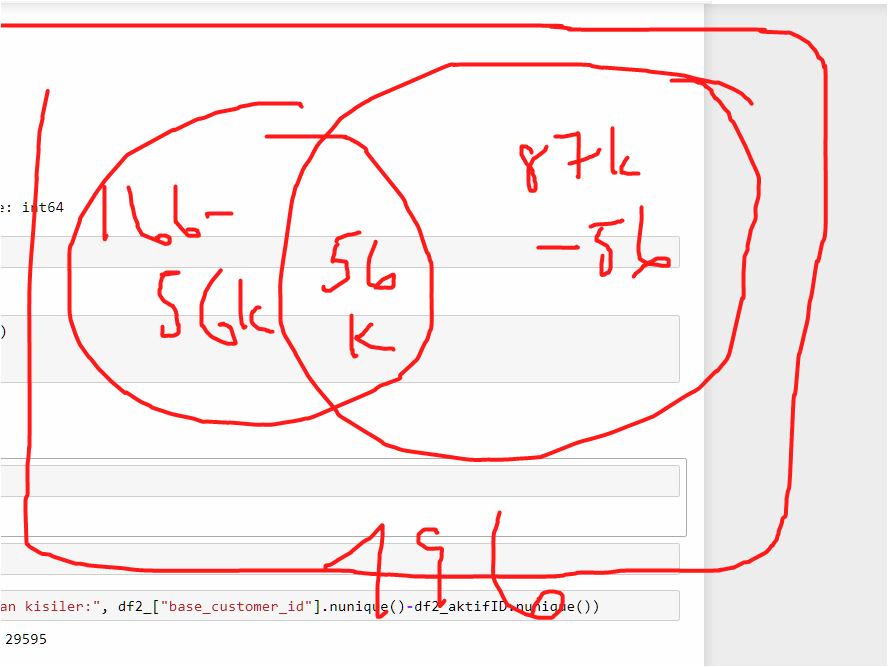

In [ ]:
# df_diff = pd.concat([df2_aktifID , df2_pasifID ]).drop_duplicates(keep=False)
# df_diff

In [ ]:
df2_["fk_relation_status_explanation"].value_counts(dropna=False)

In [ ]:
df2_["base_customer_id"].nunique()

In [ ]:
df2_.shape

In [ ]:
df2_target_customer = pd.merge(df2_aktifID, df2_pasifID, how='inner')
df2_target_customer

In [ ]:
df2_target_customer.nunique()
# hem pasif hem de aktif araci olan bizim potansiyel arac alacagini dusundugumuz kitle

In [ ]:
# set(df2_target_customer["base_customer_id"])

In [ ]:
len(set(df2_target_customer["base_customer_id"]))
# hem pasif hem de aktif araci olan bizim potansiyel arac alacagini dusundugumuz kitlenin base customer idileri

In [ ]:
df2_[df2_["base_customer_id"]==131075]

In [ ]:
df2_["fk_relation_status_explanation"].value_counts(dropna=False)

In [ ]:
df2_[df2_["fk_relation_status_explanation"]=="Aktif Ruhsat Sahibi"]["base_customer_id"].nunique()

In [ ]:
df2_[df2_["fk_relation_status_explanation"]=="Pasif Ruhsat Sahibi"]["base_customer_id"].nunique()

In [ ]:
df_.head(2)

In [ ]:
df2_.head(2)

In [ ]:
df2_["fk_relation_status_id"].value_counts(dropna=False)

In [ ]:
((df2_["fk_relation_status_id"]==1)&(df2_["fk_relation_status_explanation"]=="Aktif Ruhsat Sahibi")).value_counts()

In [ ]:
((df2_["fk_relation_status_id"]==2)&(df2_["fk_relation_status_explanation"]=="Pasif Ruhsat Sahibi")).value_counts()
# 1 olanlarin Aktif Ruhsat Sahibi oldugu teyit edildi
# 2 olanlarin Pasif Ruhsat Sahibi oldugu teyit edildi
# dolayisi ile fk_relation_status_idyi dusuyoruz
# unnamed:_0 da dusuyoruz

In [ ]:
drop_columns(df2_, "fk_relation_status_id")

In [ ]:
df2_.head(2)

In [ ]:
df_.shape
# df7_ ve df1_ join edilmisti suana kadar

In [ ]:
df2_.shape

In [ ]:
df_.head(2)

In [ ]:
df_ = df_.merge(df2_, on="base_customer_id", how='left')
df_["base_customer_id"].nunique()

In [ ]:
df_.head(2)

In [ ]:
df_.shape
# df7_ ve df1_ join edilmisti, simdi de df2_ join edildi

#### VEHICLE ID UZERINDEN JOIN KISMI

In [ ]:
df3_.head(1)

In [ ]:
df3_.shape

In [ ]:
df4_.head(1)

In [ ]:
df4_.shape

In [ ]:
df5_.head(1)

In [ ]:
df5_.shape

In [ ]:
df6_.head(1)

In [ ]:
df6_.shape

In [ ]:
df6_vehicle = df6_["vehicle_id"]
df6_vehicle.nunique()

In [ ]:
df5_vehicle = df5_["vehicle_id"]
df5_vehicle

In [ ]:
df4_vehicle = df4_["vehicle_id"]
df4_vehicle

In [ ]:
df_.shape

In [ ]:
df_vehicle = df_["vehicle_id"]
df_vehicle

In [ ]:
df7_.head()

### df7_ ve df2_ uzerinden kod deneme

In [ ]:
df2_.head()

In [ ]:
df2_["base_customer_id"]

In [ ]:
df2_["base_customer_id"].nunique()
# aktif ve/veya pasif ve pasif araci olan kisilerin unique toplam sayisi

In [ ]:
df7_["base_customer_id"].nunique()
# aktif ve/veya pasif araci olan kisilerin unique toplam sayisi

In [ ]:
df2_["base_customer_id"].nunique()-df7_["base_customer_id"].nunique()
# sadece pasif araci olan kisilerin unique sayisi

In [ ]:
pd.merge(df7_["base_customer_id"], df2_["base_customer_id"], how='inner').nunique()

In [ ]:
215122+104877*2

In [ ]:
df2_target_customer = pd.merge(df2_aktifID, df2_pasifID, how='inner')
df2_target_customer.nunique()
# hem aktif hem pasif araci olan unique kisiler bunlarin toplam 105059 pasif araci var

In [ ]:
df2__ = pd.merge(df7_["base_customer_id"], df2_["base_customer_id"], how='outer', indicator='Exist')
df2__ = df2__.loc[df2__['Exist'] != 'both']
df2__["Exist"].value_counts()
# sadece pasif araci olan kisilerin  arac sayisi teyit (birden fazla arac kayitlari var)

In [ ]:
# If you like to filter by a common ID
df2___  = pd.merge(df7_, df2_, on="base_customer_id", how='outer', indicator='Exist')
df2___  = df2___.loc[df2___['Exist'] == 'both']
df2___["Exist"].value_counts()
# sadece aktif 215122 araci olan 110781 kisinin araclari ile  hem aktif hem pasif araci olan
# 56162 kisinin 105059 pasif araclarin toplam sayisi

In [ ]:
df2___[df2___["fk_relation_status_explanation"]=="Pasif Ruhsat Sahibi"]["base_customer_id"].nunique()
# sadece pasif araci olan kisilerin unique sayisi teyit

In [ ]:
# set(df2___[df2___["fk_relation_status_explanation"]=="Pasif Ruhsat Sahibi"]["base_customer_id"])
# sadece pasif araci olan kisilerin base customer idleri

In [ ]:
df2_[df2_["fk_relation_status_explanation"]=="Aktif Ruhsat Sahibi"]["base_customer_id"].nunique()

In [ ]:
# df2_[df2_["fk_relation_status_explanation"]=="Aktif Ruhsat Sahibi"]
# # burdan giderek sadece aktif arac sahibi olan 110331 kisiyi bulsak iyi olabilir

### df7_ ve df2_ uzerinden kod deneme sonu

# vehicle id uzerinden merge karar sureci

# df4_
# 300900 aracin 146724u ortak 22797 aracin bilgisi df4_ de fazlalik

In [ ]:
df_["vehicle_id"].shape

In [ ]:
df_["vehicle_id"].nunique()

In [ ]:
df_[["vehicle_id", "base_customer_id"]].isnull().sum()

In [ ]:
df_[["vehicle_id", "base_customer_id"]]["base_customer_id"].nunique()

In [ ]:
df4_["vehicle_id"].shape

In [ ]:
df4_["vehicle_id"].nunique()

In [ ]:
pd.merge(df_vehicle, df4_vehicle, how='inner').nunique()
# 300900 aracin 146724u ortak 22797 aracin bilgisi df_ de eksik

In [ ]:
df4__ = pd.merge(df_vehicle, df4_vehicle, how='outer', indicator='Exist')
df4__ = df4__.loc[df4__['Exist'] != 'both']
df4__["Exist"].value_counts()

In [ ]:
# If you like to filter by a common ID
df4__  = pd.merge(df_, df4_, on="vehicle_id", how='outer', indicator='Exist')
df4__  = df4__.loc[df4__['Exist'] == 'both']
df4__["Exist"].value_counts()

In [ ]:
df4__["vehicle_id"].nunique()

# df5_

# 300900 aracin 300900u ortak 44192 arac bilgisi df5_ de fazlalik var

In [ ]:
df_["vehicle_id"].shape

In [ ]:
df_["vehicle_id"].nunique()

In [ ]:
pd.merge(df_vehicle, df5_vehicle, how='inner').nunique()

In [ ]:
df5__ = pd.merge(df_vehicle, df5_vehicle, how='outer', indicator='Exist')
df5__ = df5__.loc[df5__['Exist'] != 'both']
df5__["Exist"].value_counts()

In [ ]:
df5__ = pd.merge(df_vehicle, df5_vehicle, how='outer', indicator='Exist')
df5__ = df5__.loc[df5__['Exist'] == 'both']
df5__["Exist"].value_counts()

# df6_
# 194175 ortak 127970 df6da fazlalik var

In [ ]:
df_["vehicle_id"].nunique()

In [ ]:
pd.merge(df_vehicle, df6_vehicle, how='inner').nunique()

In [ ]:
df6__ = pd.merge(df_vehicle, df6_vehicle, how='outer', indicator='Exist')
df6__ = df6__.loc[df6__['Exist'] != 'both']
df6__["Exist"].value_counts()

In [ ]:
df6__ = pd.merge(df_vehicle, df6_vehicle, how='outer', indicator='Exist')
df6__ = df6__.loc[df6__['Exist'] == 'both']
df6__["Exist"].value_counts()

# df4_ ve df5_

# 169521 ortak 175571 df5_ de fazla

In [ ]:
df4_vehicle.shape

In [ ]:
df4_vehicle.nunique()

In [ ]:
df5_vehicle.shape

In [ ]:
df5_vehicle.nunique()

In [ ]:
pd.merge(df4_vehicle, df5_vehicle, how='inner').nunique()

In [ ]:
df45__ = pd.merge(df4_, df5_, on="vehicle_id", how='outer', indicator='Exist')
df45__  = df45__.loc[df45__['Exist'] != 'both']
df45__["Exist"].value_counts()

# df4_ ve df6_

# 121830 ortak 47693 df4_ de fazla

In [ ]:
df4_vehicle.shape

In [ ]:
df4_vehicle.nunique()

In [ ]:
df6_vehicle.shape

In [ ]:
df6_vehicle.nunique()

In [ ]:
pd.merge(df4_vehicle, df6_vehicle, how='inner').nunique()

In [ ]:
df46__ = pd.merge(df4_, df6_, on="vehicle_id", how='outer', indicator='Exist')
df46__  = df46__.loc[df46__['Exist'] != 'both']
df46__["Exist"].value_counts()

# df5_ ve df6_

# 225447 ortak  df5_ de 119645 fazlalik var

In [ ]:
df5_vehicle.shape

In [ ]:
df5_vehicle.nunique()

In [ ]:
df6_vehicle.shape

In [ ]:
df6_vehicle.nunique()

In [ ]:
pd.merge(df5_vehicle, df6_vehicle, how='inner').nunique()

In [ ]:
df56__ = pd.merge(df5_, df6_, on="vehicle_id", how='outer', indicator='Exist')
df56__  = df56__.loc[df56__['Exist'] != 'both']
df56__["Exist"].value_counts()

# df_ ve df3_

# 147268 ortak 82481 df3_de fazla

In [ ]:
df_["customer_id"].shape

In [ ]:
df_["customer_id"].nunique()

In [ ]:
df3_["customer_id"].shape

In [ ]:
df3_["customer_id"].nunique()

In [ ]:
pd.merge(df_["customer_id"], df3_["customer_id"], how='inner').nunique()

In [ ]:
df_3__ = pd.merge(df_, df3_, on="customer_id", how='outer', indicator='Exist')
df_3__  = df_3__.loc[df_3__['Exist'] != 'both']
df_3__["Exist"].value_counts()

# df3_ ve df df4_ 
# 89233 ortakdf4_de 51808 fazla

In [ ]:
df3_["customer_id"].shape

In [ ]:
df3_["customer_id"].nunique()

In [ ]:
df4_["customer_id"].shape

In [ ]:
df4_["customer_id"].nunique()

In [ ]:
pd.merge(df3_["customer_id"], df4_["customer_id"], how='inner').nunique()

In [ ]:
df34__ = pd.merge(df3_, df4_, on="customer_id", how='outer', indicator='Exist')
df34__ = df34__.loc[df34__['Exist'] != 'both']
df34__["Exist"].value_counts()

# df_ ve df5_ merge

In [ ]:
df_.shape

In [ ]:
df_.head(2)

In [ ]:
df5_.shape

In [ ]:
df5_.head(2)

In [ ]:
df_["vehicle_id"].nunique()

In [ ]:
df_["base_customer_id"].nunique()

# stop

In [ ]:
df_ = df_.merge(df5_, on = "vehicle_id", how='left')
df_["base_customer_id"].nunique()
# df712 idi 5 eklendi ortalik karisti

In [ ]:
df_.head(2)

In [ ]:
df_.shape

# df_ ve df4_ merge

In [ ]:
df_["vehicle_id_x"].nunique()

In [ ]:
df_["vehicle_id_y"].nunique()

# df_ ve df6_ merge

In [ ]:
df4_.rename({'create_date': 'create_date_sifirarac'}, axis=1, inplace=True)
df4_

In [ ]:
pd.merge(df4_vehicle, df5_vehicle, how='inner').nunique()

In [ ]:
df_ = df_.merge(df2_, on = "base_customer_id", how='left')
df_["base_customer_id"].nunique()
# df7_+df_1(BaseCustID)+df3_(CustomerID)

In [ ]:
df2_aktif = df2_[df2_["fk_relation_status_explanation"]=="Aktif Ruhsat Sahibi"]["base_customer_id"]
df2_aktif

In [ ]:
df2_pasif = df2_[df2_["fk_relation_status_explanation"]=="Pasif Ruhsat Sahibi"]["base_customer_id"]
df2_pasif 

In [ ]:
df2_.shape

In [ ]:
df_diff = pd.concat([df2_pasif, df2_aktif]).drop_duplicates(keep=False)
df_diff

In [ ]:
159757-106685

In [ ]:
df_.shape

In [ ]:
df_.head()

In [ ]:
df_ = df_.merge(df6_, on = "vehicle_id", how='left')
df_["base_customer_id"].nunique()
# df7_+df_1(BaseCustID)+df3_(CustomerID)

In [ ]:
df_.shape

In [ ]:
df_.head()

In [ ]:
df_["vehicle_id"].nunique()

In [ ]:
df_[(df_["base_customer_id"].notnull())&(df_["vehicle_id"].isnull())]["base_customer_id"]

In [ ]:
df_vehicle = df_["vehicle_id"]

In [ ]:
df_diff = pd.concat([df_vehicle, df2_vehicle]).drop_duplicates(keep=False)
df_diff

In [ ]:
df_[df_["vehicle_id"]==5124447]

In [ ]:
df6_[df6_["vehicle_id"]==5124447]

In [ ]:
df6_[df6_["vehicle_id"]==5095487]

In [ ]:
df6_[df6_["vehicle_id"]==5009220]

In [ ]:
df6_[df6_["vehicle_id"]==5251191]

In [ ]:
df2_vehicle[df2_vehicle==5251191]

In [ ]:
df_[df_["vehicle_id"]==5251191]

In [ ]:
df_["fk_relation_status_explanation"].value_counts()

In [ ]:
df_vehicle.nunique()

In [ ]:
df2_vehicle.nunique()

In [ ]:
df2_.info()

In [ ]:
len(df_)

In [ ]:
df_[["base_customer_id","vehicle_id"]].value_counts()

In [ ]:
df2_vehicle

In [ ]:
df2_.shape

In [ ]:
df4_.head(2)

In [ ]:
df4_.shape

In [ ]:
df_ = df_.merge(df2_, on = "base_customer_id", how='left')
df_["base_customer_id"].nunique()
# df7_+df_1(BaseCustID)+df3_(CustomerID)

In [ ]:
drop_columns(df_, ["expected", "unnamed:_0_x", "unnamed:_0_y"])

In [ ]:
df_.head()

In [ ]:
df_ = df_.merge(df3_, on = "customer_id", how='left')
df_["base_customer_id"].nunique()

In [ ]:
df_.shape

In [ ]:
df4_.head()

In [ ]:
df_ = df_.merge(df4_, on = "customer_id", how='left')
df_["base_customer_id"].nunique()

In [ ]:
df.head(2)

In [ ]:
df_.head(2)

In [ ]:
df1_.head(2)

In [ ]:
df2_.head(2)

In [ ]:
df3_.head(2)

In [ ]:
df4_.head(2)

In [ ]:
df5_.head(2)

In [ ]:
df6_.head(2)

In [ ]:
df7_.head(2)